# <Center>  **Python Basics for City Data**<Center>
## Part II: Analyzing Chicago Public Schools Performance with Regional Data

**Overview and Data** <br/>
This tutorial delves into the exploration and predictive analysis of a comprehensive crime dataset from Chicago, covering incidents from the past year. The dataset features detailed records such as the type, location, and time of crimes, along with arrest outcomes. This real-world data provides a foundation for understanding the patterns and dynamics of urban crime.

**Technical Skills** <br/>
Develop and refine technical skills in Python programming, data manipulation with pandas, and exploratory data analysis techniques. Additionally, the tutorial covers predictive modeling fundamentals using scikit-learn, focusing on data preprocessing, feature engineering, and the deployment of machine learning algorithms. This segment is designed to provide hands-on experience, making it ideal for those interested in applying data science methodologies to societal issues.

*This tutorial builds upon the concepts introduced in Part I. If you are new to Python, it is recommended that you begin with that section.*

***

## **1. Import Libraries and Read-In Data**

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
data = pd.read_csv('../Data/Crimes_one_year_prior_to_present.csv')
# Display the first five rows of the dataset
data.head()


,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JG497095,11/08/2023 08:50:00 PM,025XX N KEDZIE BLVD,0810,THEFT,OVER $500,STREET,N,N,1414,35.0,06,1154609.0,1916759.0,41.927407,-87.707294,"(41.927407329, -87.70729439)"
1,JG496991,11/08/2023 03:14:00 PM,0000X W CHICAGO AVE,0560,ASSAULT,SIMPLE,STREET,N,N,1832,42.0,08A,1176106.0,1905725.0,41.896672,-87.628635,"(41.896671699, -87.628635323)"
2,JG497145,11/08/2023 10:55:00 PM,019XX W 47TH ST,051A,ASSAULT,AGGRAVATED - HANDGUN,SIDEWALK,N,N,931,15.0,04A,1164331.0,1873509.0,41.808525,-87.672793,"(41.808525157, -87.672792896)"
3,JG496701,11/08/2023 04:39:00 PM,025XX W BALMORAL AVE,502P,OTHER OFFENSE,FALSE / STOLEN / ALTERED TRP,STREET,N,N,2011,40.0,26,1158314.0,1935772.0,41.979505,-87.693158,"(41.979505088, -87.693158103)"
4,JG484195,10/28/2023 07:30:00 PM,067XX S PARNELL AVE,0810,THEFT,OVER $500,APARTMENT,N,N,722,6.0,06,1173732.0,1860233.0,41.771891,-87.638706,"(41.771890947, -87.638705659)"


## **2. Data Preprocessing**

In [20]:
# Convert 'DATE OF OCCURRENCE' from string to datetime
data['DATE OF OCCURRENCE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])

# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in ['BLOCK', 'IUCR', 'PRIMARY DESCRIPTION', 'SECONDARY DESCRIPTION', 'LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

LabelEncoder()


## **3. Exploratory Data Analysis**

### 3.1 Produce general statistics of the dataset using `.describe()` operation which helps us understand the distribution of different features.

In [4]:
# General statistics
data.describe()


,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE
count,258030,258030.000000,258030.000000,258030.000000,258030.000000,258030.000000,258030.000000,258030.000000,258030.000000,258027.000000,2.579650e+05,2.579650e+05,257965.000000,257965.000000
mean,2023-07-17 05:54:15.674421760,13730.556145,98.186188,14.149521,150.480952,83.087990,0.118436,0.180126,1156.054323,23.114267,1.165318e+06,1.887372e+06,41.846531,-87.668821
min,2023-01-15 05:05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000,1.000000,1.091242e+06,1.813897e+06,41.644590,-87.939733
25%,2023-04-21 18:10:00,5815.250000,58.000000,2.000000,68.000000,46.000000,0.000000,0.000000,533.000000,10.000000,1.153927e+06,1.859961e+06,41.771046,-87.710304
50%,2023-07-18 17:00:00,13796.000000,81.000000,16.000000,173.000000,100.000000,0.000000,0.000000,1032.000000,23.000000,1.167084e+06,1.893531e+06,41.863539,-87.662316
75%,2023-10-11 16:00:00,21626.000000,135.000000,29.000000,235.000000,117.000000,0.000000,0.000000,1732.000000,34.000000,1.176778e+06,1.910402e+06,41.909945,-87.626885
max,2024-01-14 00:00:00,28683.000000,313.000000,30.000000,291.000000,132.000000,1.000000,1.000000,2535.000000,50.000000,1.205119e+06,1.951506e+06,42.022549,-87.524532
std,NaN,8579.182814,61.076153,11.245537,92.330699,40.386371,0.323124,0.384293,712.334498,13.998032,1.632598e+04,3.173126e+04,0.087260,0.059438


### 3.2 Visualize the most common types of crimes reported in the dataset 

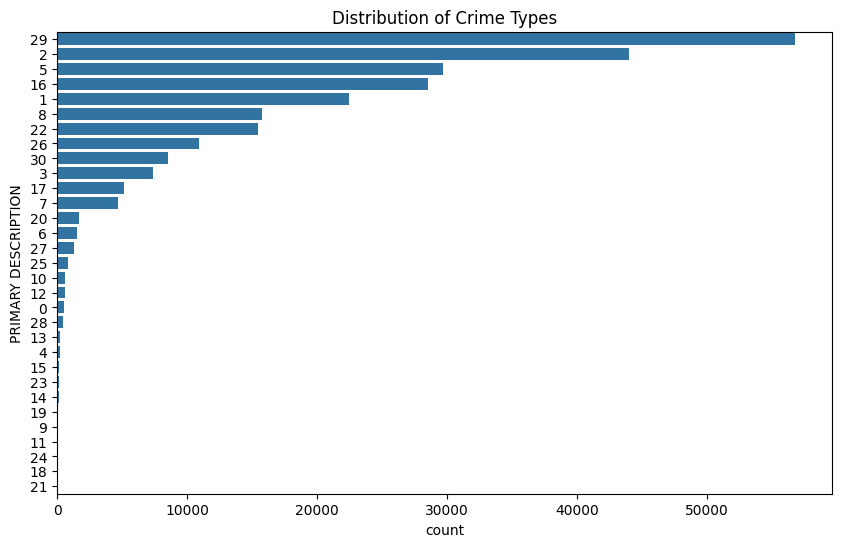

In [5]:
# Visualizing crime types
plt.figure(figsize=(10, 6))
sns.countplot(y='PRIMARY DESCRIPTION', data=data, order = data['PRIMARY DESCRIPTION'].value_counts().index)
plt.title('Distribution of Crime Types')
plt.show()

# Add original labels back in. 


## **4.Feature Selection**

Select relevant features based on our domain knowledge and preliminary data analysis. For example, we expect that the location and type of crime could influence the likelihood of an arrest.

In [6]:
# Selecting relevant features for our model
features = ['IUCR', 'LOCATION DESCRIPTION', 'DOMESTIC', 'BEAT', 'LATITUDE', 'LONGITUDE']
X = data[features]
y = data['ARREST']

## **5. Implimenting a Random Forest Classifier**

### 5.1 Model Training 

In [7]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Replace missing values the median values. 
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Creating and training the model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)


RandomForestClassifier()

### 5.2  Model Evaluation 

#### *5.2.1 Confusion Matrix*

In [8]:
# Making predictions and evaluating the model
def predict(X_test,y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    #Print the accuracy: 
    print(f"Accuracy: {accuracy}")

    #Visualize confusion matrix 
    plt.figure(figsize=(6,6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    return y_pred

Accuracy: 0.9213851102584971


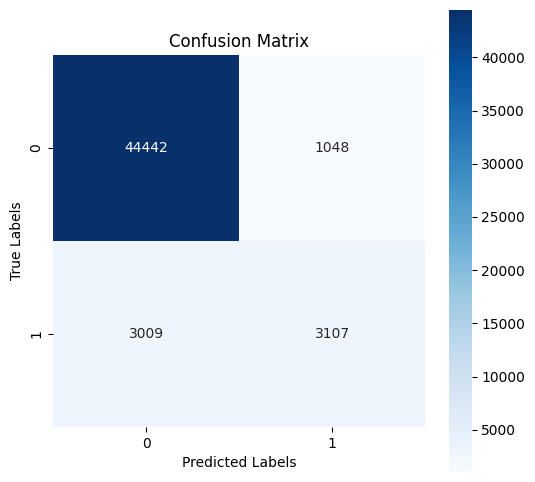

In [9]:
predict(X_test,y_test)
plt.show()

The confusion matrix for your model is interpreted as follows:

* True Negatives (TN): 45,028 cases correctly predicted as 'no arrest'.
* False Positives (FP): 462 cases wrongly predicted as 'arrest'.
* False Negatives (FN): 3,279 cases wrongly predicted as 'no arrest'.
* True Positives (TP): 2,837 cases correctly predicted as 'arrest'.

The model is proficient at identifying 'no arrest' scenarios but less effective at predicting actual arrests, as indicated by the high number of False Negatives compared to True Positives. This suggests a need for improving the model's ability to detect 'arrest' cases without sacrificing its overall accuracy.

#### *5.2.2 Feature Importances*

In [10]:
def feature_importance(X_train):
    feature_importances = model.feature_importances_
    importances = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)
    print(importances)

In [11]:
feature_importance(X_train)

IUCR                    0.386190
LATITUDE                0.203063
LONGITUDE               0.200145
LOCATION DESCRIPTION    0.102220
BEAT                    0.087633
DOMESTIC                0.020748
dtype: float64


## **6. Refining the Model**

If the dataset is imbalanced (disproportionate number of 'arrest' vs 'no arrest' cases), use techniques to balance it.

* Count the number of arrests to non-arrests. Are they balanced? 

In [12]:
data['ARREST'].value_counts()

ARREST
0    227470
1     30560
Name: count, dtype: int64

Use SMOTE to oversample disproportionate number of arrests vs no arrest 

In [13]:
from imblearn.over_sampling import SMOTE #may need to pip install imblearn

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Retrain model with balanced data
model.fit(X_resampled, y_resampled)

RandomForestClassifier()

Accuracy: 0.9912243103637762


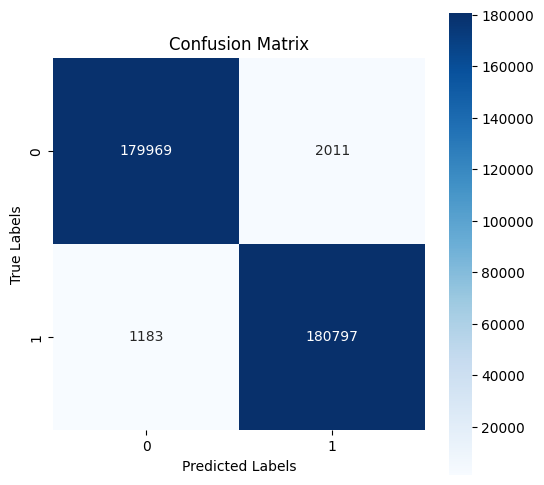

In [14]:
predict(X_resampled,y_resampled)
plt.show()

In [15]:
feature_importance(X_resampled)

IUCR                    0.423322
LATITUDE                0.169191
LONGITUDE               0.163513
LOCATION DESCRIPTION    0.121421
BEAT                    0.099819
DOMESTIC                0.022735
dtype: float64


*** 

# Conclusion
In this tutorial, we've gone through the process of analyzing and predicting crime outcomes in Chicago. 
